In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mt

In [4]:
df=pd.read_csv('/home/jaya/Documents/vscode/Pizza Data For SQL & Excel/pizza_sales.csv')

In [5]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015/01/01,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015/01/01,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015/01/01,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015/01/01,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015/01/01,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_id           48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_name_id      48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   unit_price         48620 non-null  float64       
 6   total_price        48620 non-null  float64       
 7   pizza_size         48620 non-null  object        
 8   pizza_category     48620 non-null  object        
 9   pizza_ingredients  48620 non-null  object        
 10  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 4.1+ MB


In [13]:
df['order_date']=pd.to_datetime(df['order_date'])

In [15]:
df['total_price'].sum()

817860.05

In [17]:
df['quantity'].sum()

49574

In [19]:
df['order_id'].count()

48620

In [ ]:
pj=df.groupby('order_date')['total_price'].sum()

order_date
2015-01-01    2713.85
2015-01-02    2731.90
2015-01-03    2662.40
2015-01-04    1755.45
2015-01-05    2065.95
               ...   
2015-12-27    1419.00
2015-12-28    1637.20
2015-12-29    1353.25
2015-12-30    1337.80
2015-12-31    2916.00
Name: total_price, Length: 358, dtype: float64


<AxesSubplot: xlabel='month'>

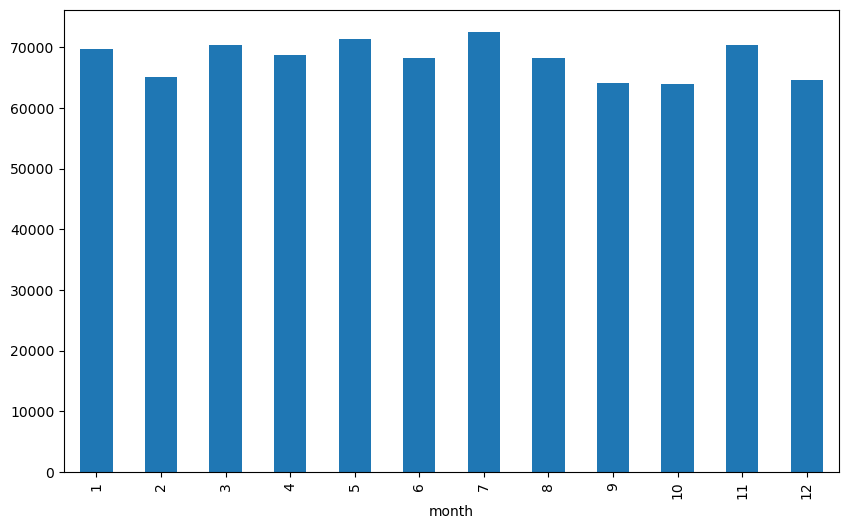

In [147]:
df['month']= df['order_date'].dt.month
Sale_month=df.groupby('month')['total_price'].sum()
Sale_month.plot(kind='bar',figsize=(10,6))


unit_price
20.75    184488.25
16.75     73365.00
16.00     72352.00
12.00     68928.00
16.50     67831.50
20.25     62633.25
12.50     42250.00
20.50     41533.00
12.75     32244.75
18.50     26066.50
17.95     23622.20
16.25     18460.00
25.50     14076.00
23.65     11588.50
15.25     11102.00
10.50     10710.00
12.25     10412.50
14.75      8643.50
9.75       7322.25
17.50      6720.00
13.25      6399.75
11.00      6358.00
14.50      5756.50
21.00      3990.00
35.95      1006.60
Name: total_price, dtype: float64


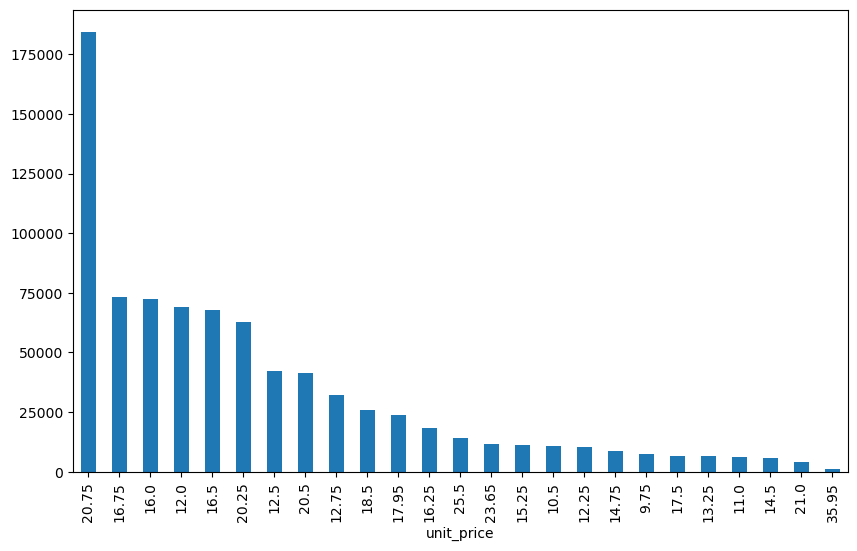

In [36]:
ax=df.groupby('unit_price')['total_price'].sum()
ax=ax.sort_values(ascending=False)
ax.plot(kind='bar',figsize=(10,6))
print(ax)

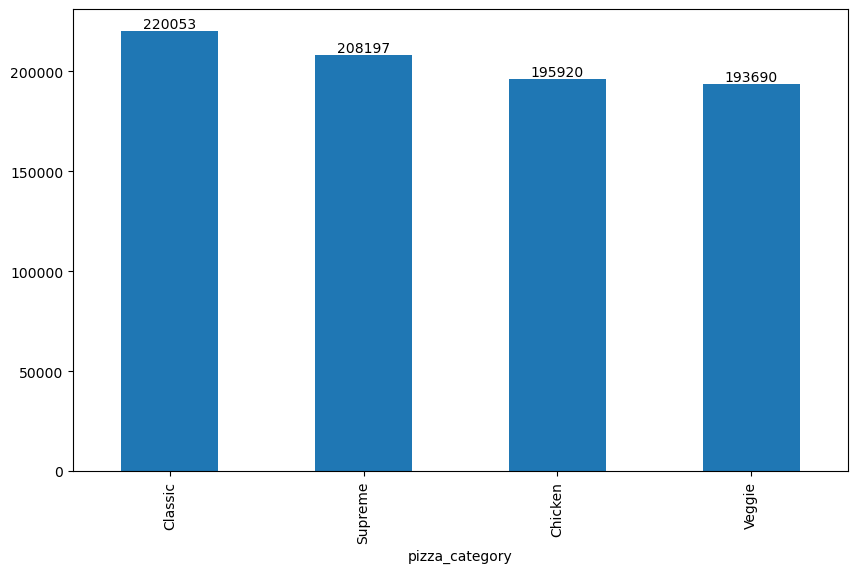

In [57]:
data = df.groupby('pizza_category')['total_price'].sum()
data = data.sort_values(ascending=False)
ax = data.plot.bar(figsize=(10, 6))
for container in ax.containers:
    ax.bar_label(container, label_type='edge')


<AxesSubplot: ylabel='total_price'>

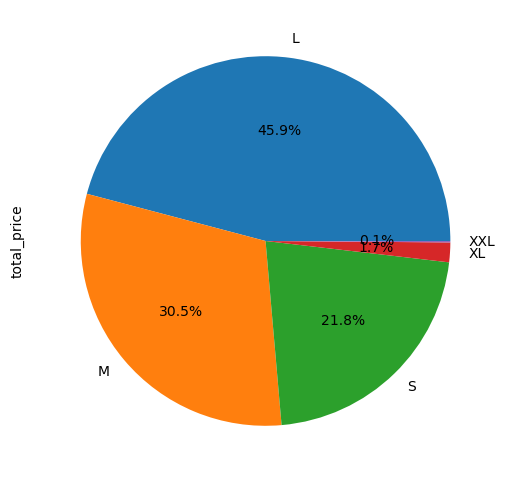

In [58]:
ax=df.groupby('pizza_size')['total_price'].sum()
ax.plot(kind='pie',figsize=(10,6),autopct='%1.1f%%')

In [65]:
ax=df.groupby('pizza_name')['unit_price'].sum()
ax=ax.sort_values(ascending=False)
ax.head(10)

pizza_name
The Thai Chicken Pizza          42332.25
The Barbecue Chicken Pizza      41683.00
The California Chicken Pizza    40166.50
The Classic Deluxe Pizza        37631.50
The Spicy Italian Pizza         34163.50
The Southwest Chicken Pizza     34081.75
The Italian Supreme Pizza       32856.25
The Hawaiian Pizza              31561.75
The Four Cheese Pizza           31361.10
The Sicilian Pizza              30123.75
Name: unit_price, dtype: float64

In [125]:
grouped1=df.groupby('pizza_name',as_index=False)['total_price'].sum()
grouped1=grouped1.sort_values(by='total_price',ascending=False).reset_index(drop=True)
print(grouped1)

                                    pizza_name  total_price
0                       The Thai Chicken Pizza     43434.25
1                   The Barbecue Chicken Pizza     42768.00
2                 The California Chicken Pizza     41409.50
3                     The Classic Deluxe Pizza     38180.50
4                      The Spicy Italian Pizza     34831.25
5                  The Southwest Chicken Pizza     34705.75
6                    The Italian Supreme Pizza     33476.75
7                           The Hawaiian Pizza     32273.25
8                        The Four Cheese Pizza     32265.70
9                           The Sicilian Pizza     30940.50
10                         The Pepperoni Pizza     30161.75
11                             The Greek Pizza     28454.10
12                          The Mexicana Pizza     26780.75
13                       The Five Cheese Pizza     26066.50
14                     The Pepper Salami Pizza     25529.00
15                 The Italian Capocollo

In [150]:
grouped1['running_total']=grouped1['total_price'].cumsum()
grand_total=grouped1['total_price'].sum()
grouped1['kontribusi_kumulatif']=grouped1['running_total']/ grand_total * 100
grouped1.head(32)

,pizza_name,total_price,running_total,kontribusi_kumulatif,kategori_ABC
0,The Thai Chicken Pizza,43434.25,43434.25,5.310719,A
1,The Barbecue Chicken Pizza,42768.00,86202.25,10.539976,A
2,The California Chicken Pizza,41409.50,127611.75,15.603128,A
3,The Classic Deluxe Pizza,38180.50,165792.25,20.271469,A
4,The Spicy Italian Pizza,34831.25,200623.50,24.530297,A
5,The Southwest Chicken Pizza,34705.75,235329.25,28.773780,A
6,The Italian Supreme Pizza,33476.75,268806.00,32.866992,A
7,The Hawaiian Pizza,32273.25,301079.25,36.813053,A
8,The Four Cheese Pizza,32265.70,333344.95,40.758190,A
9,The Sicilian Pizza,30940.50,364285.45,44.541294,A


In [151]:
def get_abc(kontribusi):
    if kontribusi <= 80:
        return 'A'
    elif kontribusi <= 95:
        return 'B'
    else:
        return 'C'

grouped1['kategori_ABC']=grouped1['kontribusi_kumulatif'].apply(get_abc)

grouped1.head(32)

,pizza_name,total_price,running_total,kontribusi_kumulatif,kategori_ABC
0,The Thai Chicken Pizza,43434.25,43434.25,5.310719,A
1,The Barbecue Chicken Pizza,42768.00,86202.25,10.539976,A
2,The California Chicken Pizza,41409.50,127611.75,15.603128,A
3,The Classic Deluxe Pizza,38180.50,165792.25,20.271469,A
4,The Spicy Italian Pizza,34831.25,200623.50,24.530297,A
5,The Southwest Chicken Pizza,34705.75,235329.25,28.773780,A
6,The Italian Supreme Pizza,33476.75,268806.00,32.866992,A
7,The Hawaiian Pizza,32273.25,301079.25,36.813053,A
8,The Four Cheese Pizza,32265.70,333344.95,40.758190,A
9,The Sicilian Pizza,30940.50,364285.45,44.541294,A


In [162]:
Total_penjualan=df.groupby('pizza_name')['total_price'].sum()
Total_cost=df.groupby('pizza_name')['unit_price'].sum()
profit= Total_penjualan - Total_cost

profit.head(32)

pizza_name
The Barbecue Chicken Pizza                    1085.00
The Big Meat Pizza                            1236.00
The Brie Carre Pizza                           236.50
The Calabrese Pizza                            170.50
The California Chicken Pizza                  1243.00
The Chicken Alfredo Pizza                      121.25
The Chicken Pesto Pizza                        217.00
The Classic Deluxe Pizza                       549.00
The Five Cheese Pizza                          925.00
The Four Cheese Pizza                          904.60
The Greek Pizza                                284.00
The Green Garden Pizza                         136.25
The Hawaiian Pizza                             711.50
The Italian Capocollo Pizza                    452.50
The Italian Supreme Pizza                      620.50
The Italian Vegetables Pizza                    88.50
The Mediterranean Pizza                        197.50
The Mexicana Pizza                             537.75
The Napolitana Pi